# TP de Diferenciación Numérica

## Ejercicio especial Covid-19

##### Grupo 4: 
- Costa Felipe
- Gutierrez Juan Santiago
- Indeau Federico
- Lucero Julieta

### Código

Utilizando python 3.12 

Se definieron las siguientes funciones, 
El código se aloja en [github](https://github.com/JuanSantiagoGutierrez/Cal_Num)



In [1]:
import numpy as np
import math
import pandas as pd

def generar_indices(n: int, traslacion:int = 0) -> np.array:
    """Genera un array simétrico de n/2 enteros alrededor de cero incluyendo el 0 \n
    ,y si n es par prefiere a la derecha. Traslada el array antes de devolverlo"""
    array = np.arange(-int(n/2), int(n/2)+1)
    if n%2 == 0: array = array[1:]
    return array + traslacion

def gen_matrix(derivada: int = 1, truncamiento: int = 2, traslacion: int = 0) -> np.ndarray:
    """Crea una matrix cuadrada para el calculo de una n-derivada usando expansiones de Taylor alrededor de un punto"""
    puntos = derivada + truncamiento
    indices = generar_indices(puntos, traslacion)
    
    # Definir una matrix cuadrada vacia
    A = np.ones((puntos,puntos))

    # Los elementos de la matrix se calculan así
    def coef(i:int ,j:int) -> float:
        return math.pow(j,i) / math.factorial(i)

    # Recorrer la matrix y generar cada elemento
    for i in range(puntos):
        for j in indices:
            k = j + sum(1 for i in indices if indices[i] < 0) # Ajusta el indice j, con el indice de la matrix de forma que indices[0] -> i,0 de la matrix
            A[i][k] = round(coef(i=i,j=j), truncamiento + 2)
  
    # Retornar la matrix
    return A
        
def coef_derivada(matrix: np.ndarray[float], derivada:int =1) -> np.ndarray[float]:
    """gen_matrix() -> A\n
    Matrix A para derivadas, aplica las condiciones para la n-derivada\n
    devolviendo los coeficientes X \n 
    X -> evaluar_derivada()"""
    # Define un vector vacio y aplica las condiciones 
    v = np.zeros((len(matrix)))
    v[derivada] = 1
    # Resuelve el sistema y lo retorna
    return np.linalg.solve(a=matrix, b=v)

def evaluar_derivada(X:np.ndarray,f:np.ufunc ,x:float=0.0, dx: float = 0.1, traslacion:int = 0, derivada:int = 1) -> float:
    """coef_derivada() -> X \n
    Evalua la derivada en un punto en base a los coeficientes X y a cual derivada se dirije \n
    -> f'(x)"""
    df = 0
    # Usa los coeficientes de X y los índices de los puntos para calcular df, recorriendo ambos arrays en simultaneo. 
    for i,j in zip(X, generar_indices(len(X), traslacion)): 
        df += i * f(x + j * dx )
    return df / math.pow(dx,derivada)

def derivar(x:float,f:np.ufunc,dx:float = 1e-6,derivada: int =1, orden:int = 2, traslacion:int=0)-> float:
    """Deriva una funcion númericamente, usando expansiones de Taylor"""
    # Calcular la matrix, por defecto da la 1er derivada
    A = gen_matrix(derivada=derivada,truncamiento=orden,traslacion= traslacion)
   
    # Calcular los coeficientes
    X = coef_derivada(matrix=A,derivada=derivada)
    
    # Evaluar la derivada
    df = evaluar_derivada(X=X, f=f, x=x, dx=dx,traslacion=traslacion, derivada=derivada)
    return df

def extrapolacion_Richarson(D0:float, D1:float, dx0:float, dx1:float, n:int)-> tuple[float]:
    """Extrapolación de Richarson\n
    Junta el resultado de dos metodos numéricos para derivadas y así obtener un resultado más exacto\n
    Ambas derivadas deben obtenerse con el mismo método y dx0 = dx1/2"""
    df = np.round(D0 + ((D0 - D1)/(math.pow((dx1/dx0),n)-1)),5) # Mejor aproximación
    err = abs(np.round((D0-D1)/(math.pow(dx1,n)-math.pow(dx0,n)),5)) # Error de la aproximación
    return (df, err)

### Datos y guía
Con las funciones anteriormente definidas se realizan los ejercicios en la guía de ejercicios: 
* *Ejercicio especial Derivacion 2021.pdf*

Con datos extraídos de https://www.argentina.gob.ar/coronavirus/informe-diario en uno de los reportes diarios. 
* En partícular: *"Reporte diario COVID-19.csv"*

### Resolución

- La resolución consta de el código realizado y la salida. Cada ejercicio está escrito como una funcion y luego se la ejecuta.  
- Se presentan los 5 primeros datos. 

In [2]:
DF = pd.read_csv("../Data/Reporte diario COVID-19.csv")

In [3]:
"""1. Aproxime la derivada primera para cada día con un esquema de orden 2 y un paso de 1 día."""
from time import time

def ejer1(DF):
    # Variables
    traslacion = 0
    derivada = 1
    orden = 2
    pasos = 1 # 
    def contagios(dia):
        return DF["acumulado"][dia-1]
    L = []
    for dia in DF["dia"]:
        traslacion = 0
        while True:
            try:
                df = derivar(x=dia, f=contagios, dx=pasos, derivada=derivada, orden=orden, traslacion=traslacion)
                break
            except:
                if dia < len(DF)//2: traslacion+=1 
                else: traslacion-=1
        L += [df]
    DF = DF.assign(df_ejer1 = L)
    print(DF.head())
    return DF

DF = ejer1(DF)


   dia  nuevo  acumulado  df_ejer1
0    1      1          1      -3.5
1    2      1          2       5.5
2    3      3         12       7.5
3    4      5         17       3.5
4    5      2         19       2.0


In [4]:
"""2. Aproxime la derivada primera para cada día con un esquema de orden 2 y un paso de 2 días"""
def ejer2(DF):
    # Variables
    traslacion = 0
    derivada = 1
    orden = 2
    pasos = 2 # 
    def contagios(dia):
        return DF["acumulado"][dia-1]
    L = []
    for dia in DF["dia"]:
        traslacion = 0
        while True:
            try:
                df = derivar(x=dia, f=contagios, dx=pasos, derivada=derivada, orden=orden, traslacion=traslacion)
                break
            except:
                if dia < len(DF)//2: traslacion+=1 
                else: traslacion-=1
        L += [df]
    DF = DF.assign(df_ejer2 = L)
    print(DF.head())
    return DF

DF = ejer2(DF)


   dia  nuevo  acumulado  df_ejer1  df_ejer2
0    1      1          1      -3.5      6.50
1    2      1          2       5.5     10.25
2    3      3         12       7.5      4.50
3    4      5         17       3.5      4.75
4    5      2         19       2.0      4.75


In [5]:
"""3. Mejore la aproximación usando la extrapolación de Richardson O(dx4)."""
def ejer3(DF):
    def D1(dia):
        return DF["df_ejer1"][dia-1]
    def D0(dia):
        return DF["df_ejer2"][dia-1]
    L = []
    L1= []
    for dia in DF["dia"]:
        df = extrapolacion_Richarson(D0=D0(dia), D1=D1(dia), dx0=2, dx1=1, n=2)
        L += [df[0]]
        L1 += [df[1]]
    DF = DF.assign(df1_Richarson_4_O = L)
    #DF = DF.assign(df1_Richarson_error = L1)
    print(DF.head())
    return DF
DF = ejer3(DF)

   dia  nuevo  acumulado  df_ejer1  df_ejer2  df1_Richarson_4_O
0    1      1          1      -3.5      6.50           -6.83333
1    2      1          2       5.5     10.25            3.91667
2    3      3         12       7.5      4.50            8.50000
3    4      5         17       3.5      4.75            3.08333
4    5      2         19       2.0      4.75            1.08333


In [6]:
"""4. Determine una fórmula de derivación centrada que sea de orden O(dx⁴).""" 
def ejer4(DF):
    derivada = 1
    traslacion = 0
    orden = 4
    A = gen_matrix(derivada=derivada, truncamiento=orden, traslacion=traslacion)
    X = coef_derivada(A, derivada=derivada)
    X = np.round(X,2)
    formula = f"({X[0]}*f-2 + {X[1]}*f-1+ {X[2]}*f0 + {X[3]}*f1+ {X[4]}*f2)/dx"
    return DF, formula
DF, formula = ejer4(DF)
print(formula)

(0.08*f-2 + -0.67*f-1+ -0.0*f0 + 0.67*f1+ -0.08*f2)/dx


In [7]:
"""5. Aproxime la derivada primera para cada día con el esquema de orden 4 y un paso de 1 día."""
def ejer5(DF):
    # Variables
    traslacion = 0
    derivada = 1
    orden = 4
    pasos = 1 
    def contagios(dia):
        return DF["acumulado"][dia-1]
    L = []
    for dia in DF["dia"]:
        traslacion = 0
        while True:
            try:
                df = derivar(x=dia, f=contagios, dx=pasos, derivada=derivada, orden=orden, traslacion=traslacion)
                break
            except:
                if dia < len(DF)//2: traslacion+=1 
                else: traslacion-=1
        L += [df]
    DF = DF.assign(df_ejer5= L)
    print(DF.head(5))
    return DF
DF = ejer5(DF)

   dia  nuevo  acumulado  df_ejer1  df_ejer2  df1_Richarson_4_O   df_ejer5
0    1      1          1      -3.5      6.50           -6.83333 -12.166585
1    2      1          2       5.5     10.25            3.91667   9.166679
2    3      3         12       7.5      4.50            8.50000   8.500003
3    4      5         17       3.5      4.75            3.08333   3.083332
4    5      2         19       2.0      4.75            1.08333   1.083331


In [8]:
"""6. Aproxime un polinomio de grado 3 usando los comandos “polyfit()”, “polyout()”, y derívelo con “polyder()”."""
def ejer6(DF):
    
    x = DF["dia"]
    y = DF["acumulado"]
    coeffs = np.polyfit(x, y, 3)
    dercoeffs = np.polyder(coeffs)
    fx = np.polyval(coeffs, x)
    dfx= np.polyval(dercoeffs,x)
    
    return dfx ,fx
dpoly_x, poly_x = ejer6(DF)

7. Realice las siguientes 4 gráficas en una misma ventana utilizando el comando subplot() que 
comparen:
- Las derivadas centradas de orden 2 con los dos pasos,
- las derivadas obtenidas por Richardson (orden 4) y la fórmula de Orden 4,
- los datos y el polinomio de grado 3, y,
- las derivadas obtenidas por la fórmula de orden 4 y las derivadas obtenidas al derivar el polinomio


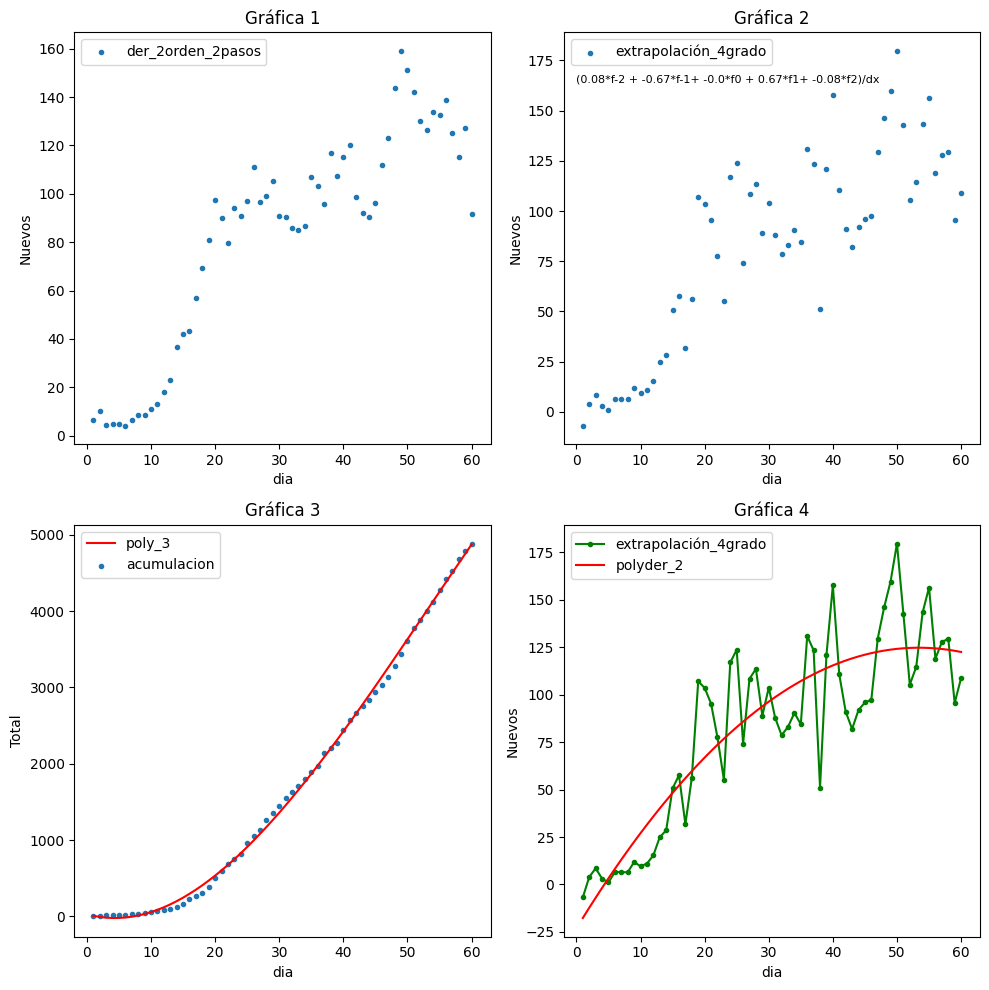

In [9]:
import matplotlib.pyplot as plt

x = DF["dia"] # Dominio

plt.figure(figsize= (10,10))
# Gráfica 1
plt.subplot(2,2,1)

dy2 = DF["df_ejer2"]

plt.scatter(x, dy2, marker = ".",label="der_2orden_2pasos")

plt.title("Gráfica 1")
plt.ylabel("Nuevos")
plt.xlabel("dia")
plt.legend()

# Gráfica 2
plt.subplot(2,2,2)

dy1 = DF["df1_Richarson_4_O"]

plt.scatter(x, dy1,marker = ".",label="extrapolación_4grado")
plt.text(0, 164, formula, size = "8")

plt.title("Gráfica 2")
plt.ylabel("Nuevos")
plt.xlabel("dia")
plt.legend()

# Gráfica 3
plt.subplot(2,2,3)

y3 = DF["acumulado"]

plt.plot(x, poly_x, label = "poly_3", color="red")
plt.scatter(x, y3,marker=".",label="acumulacion")

plt.title("Gráfica 3")
plt.ylabel("Total")
plt.xlabel("dia")
plt.legend()

# Gráfica 4
plt.subplot(2,2,4)

dy1 = DF["df1_Richarson_4_O"]

plt.plot(x, dy1,"-",marker=".",label="extrapolación_4grado", color ="green")
plt.plot(x, dpoly_x,"-", label = "polyder_2", color="red")

plt.title("Gráfica 4")
plt.ylabel("Nuevos")
plt.xlabel("dia")
plt.legend()

plt.tight_layout()
plt.show()

- Reporte sus observaciones respecto a los diferentes métodos utilizados. ¿Cuál le parece 
mejor? y ¿por qué? Compare con los datos de contagios nuevos.

1. Observaciones

- Al aumentar la cantidad de pasos en Taylor puro, la gráfica se suaviza. La gráfica de derivadas se aproxima más al polyder que a los datos "nuevo", perdiendo mucha exactitud. A su vez los extremos se resuelven trasladando los puntos evaluados, perdiendo más precision en los extremos. 

- Calcular Richarson o Taylor puro, en cuanto a tiempo de procesamiento no encontre diferencia apreciable. 

- Aumentar el grado en Taylor puro mejoro notablemente la aproximación a los valores reales de "nuevo". 

2. Opinión

- El método general de Taylor puro para derivar numéricamente es muy exacto y programarlo fue muy enriquecedor.

- Para los primeros ejercicios 1,2 y 3 note en la gráfica que el Richarson_4 es equivalente a aplicar un 1 paso y 4 grado. Sin embargo, si por lo que fuera no se pudiera obtener más allá de Taylor grado 2, Richarson lo resuelve, ya que evaluando con más puntos obtendríamos el grado 4, lo que es 100 veces más preciso. 

- Me parece que Richarson es excelente cuando cuesta realizar expansiones de Taylor y a su vez es más estable, ya que no necesita evaluar delta x muy pequeños. Pero por sencilles Taylor es suficiente para problemas sencillos. 